# LSTM 사용 예제

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/tansy/Ai/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 열을 지정된 이름으로 대체하는 방법

In [49]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [53]:
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [54]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [55]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# 상관관계 행렬 그리기 

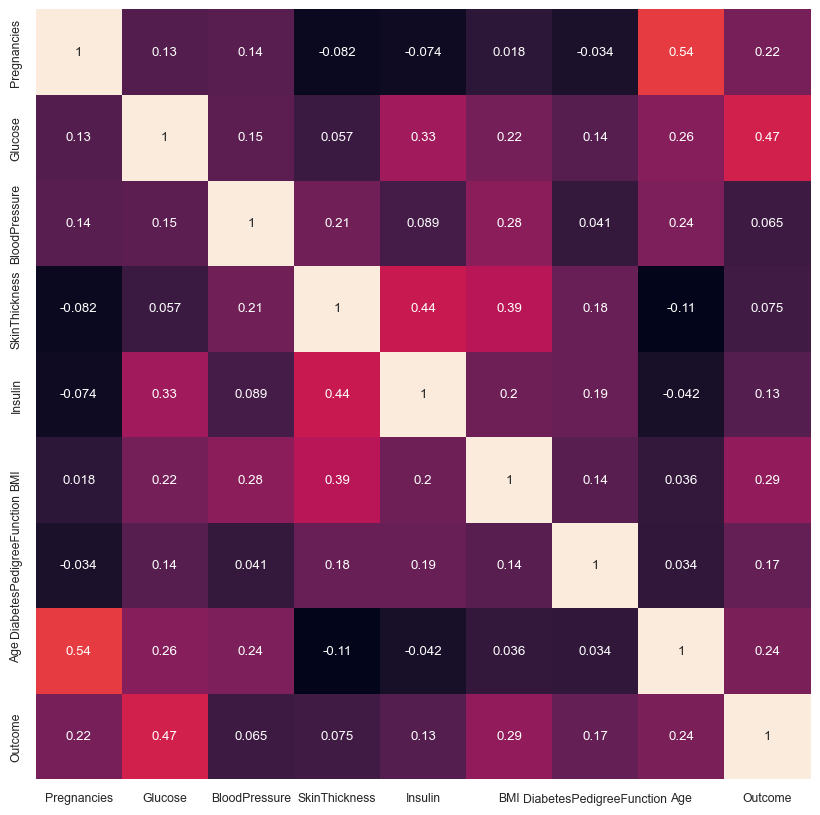

In [56]:
df_corr = df.corr() # 상관관계 행렬 

#히트맵
plt.figure(figsize=(10,10)) 
sns.set(font_scale=0.8)  
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

## PRICE와 상관관계가 아예 없는 열은 제거(특정 열만 선택) 

In [59]:
df_new = df.drop(['BloodPressure', 'SkinThickness'], axis=1)
# df_new = df[['Pregnancies','Glucose',...]]
df_new

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63,0
764,2,122,0,36.8,0.340,27,0
765,5,121,112,26.2,0.245,30,0
766,1,126,0,30.1,0.349,47,1


## 정답 레이블 분포 확인 

Text(0.5, 1.0, 'OutCome')

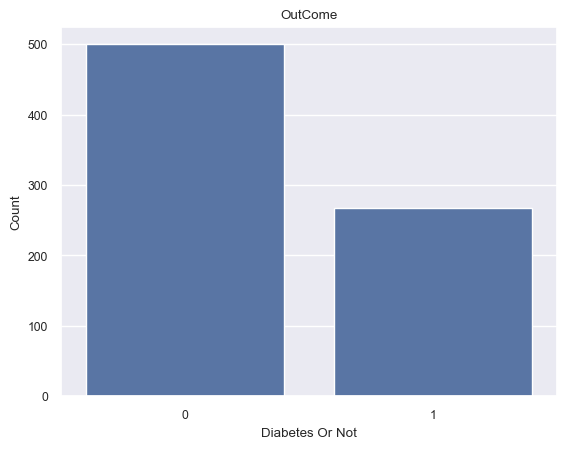

In [63]:
sns.countplot(data = df, x="Outcome")
plt.xlabel("Diabetes Or Not") 
plt.ylabel("Count")
plt.title("OutCome") 

In [62]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## 컬럼 각각의 히스토그램 그리기 

C:\Users\tansy\AppData\Local\Temp\ipykernel_9988\3132755532.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_new.hist(ax = ax)


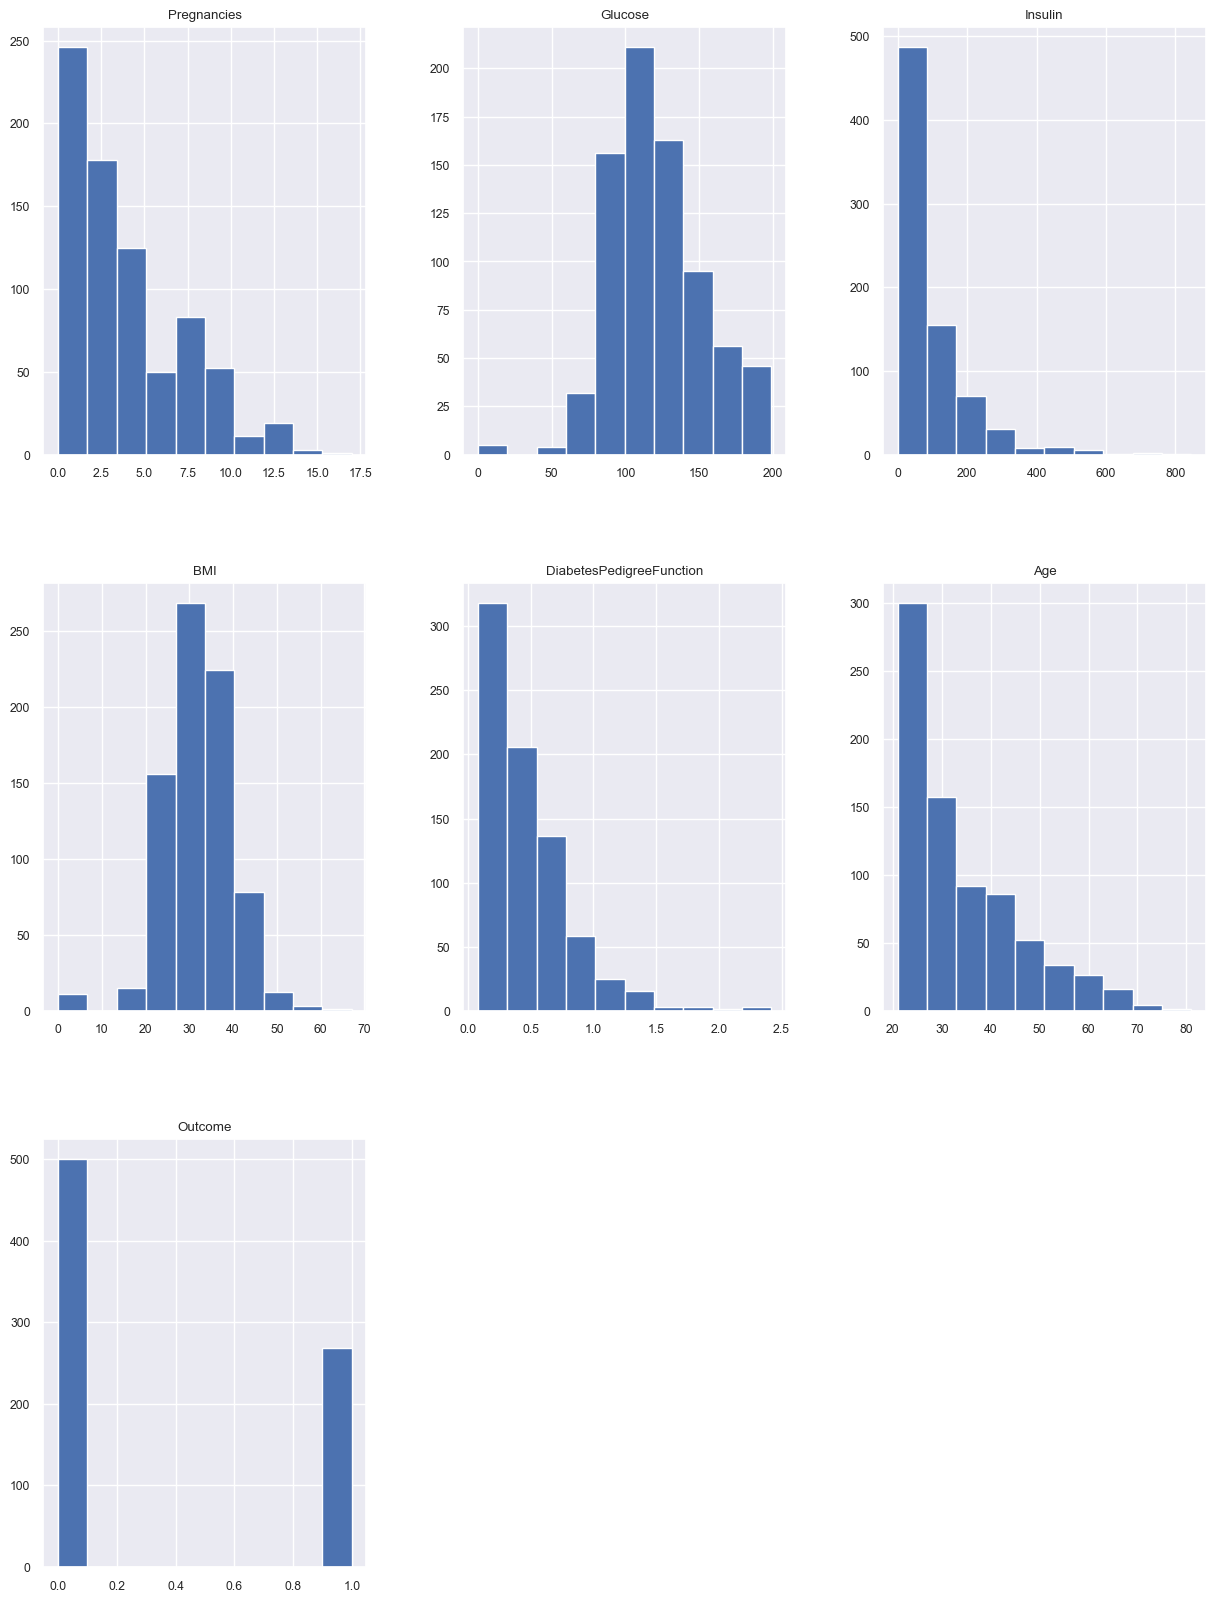

In [60]:
fig = plt.figure(figsize = (15,20)) 
ax = fig.gca() 
df_new.hist(ax = ax) 
plt.show() 

# 데이터 준비

In [90]:
X = df_new.drop('Outcome', axis=1) 
X.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33


In [91]:
y = df_new.Outcome
y.value_counts().sort_index()

Outcome
0    500
1    268
Name: count, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

# 데이터를 시퀀스 데이터로 변환하기 

In [67]:
from collections import Counter
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()  # 빈 리스트를 생성하여 시퀀스 데이터와 레이블을 담을 공간을 만듦
    for i in range(len(sequences)):  # 전체 시퀀스 데이터를 순회
        # find the end of this pattern
        end_ix = i + n_steps  # 현재 인덱스(i)에서 n_steps만큼 떨어진 시퀀스의 끝을 계산
        # check if we are beyond the dataset
        if end_ix > len(sequences):  # 시퀀스 끝이 데이터의 범위를 넘어서는지 확인
            break  # 범위를 넘으면 루프 종료
        # gather input (X) and output parts (y)
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터 (특징 데이터)
        seq_y_values = sequences[i:end_ix, -1]  # 시퀀스 동안의 출력 데이터 (레이블들)
        
        # 가장 빈번하게 나온 레이블 찾기
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]
        
        X.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가
    
    return np.array(X), np.array(y)  # 리스트를 numpy 배열로 변환하여 반환

### 컬럼과 레이블 병합하기

In [93]:
y_train = np.array(y_train)
train_set = np.c_[X_train, y_train]

y_test = np.array(y_test)
test_set = np.c_[X_test, y_test]

### 훈련, 검증 세트 각각 시퀀스 데이터로 만들기

In [96]:
n_step = 3 

X_train, y_train = split_sequences(train_set, n_step)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, n_step)
print(X_test.shape, y_test.shape)

(612, 3, 6) (612,)
(152, 3, 6) (152,)


## 레이블 인코딩 방법 : (1). 원-핫 인코딩

In [70]:
from keras.utils import to_categorical

y_train = to_categorical(y_train) 
y_test = to_categorical(y_test) 

y_train.shape

(612, 2)

## 레이블 인코딩 방법 : (2). 문자 => 정수값으로 인코딩하기(라벨인코더) 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

## 모델 구축을 위해 shape 저장

In [72]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
print(n_timesteps, n_features, n_outputs)

3 6 2


# LSTM 모델 구축

In [75]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D

# 1. LSTM만 추가

## (1). 이진 분류 시의 모델 

In [98]:
model = Sequential()
model.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(), 'binary_crossentropy', metrics=['accuracy'])

C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## (2). 다중 분류 시의 모델

In [80]:
model = Sequential()
model.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 128)                 │          69,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,890 (335.51 KB)

 Trainable params: 85,890 (335.51 KB)

 Non-trainable params: 0 (0.00 B)

# 2. CNN + LSTM 모델

In [115]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from keras.optimizers import Adam

# 모델 생성
model = Sequential()

# 1D CNN 층 추가
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(MaxPooling1D(pool_size=2, padding='same')) # padding='same' => 풀링을 진행해도 크기는 안 줄어들게 설정

# LSTM 층 추가
model.add(LSTM(units=128))

# Dense 층 추가
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [116]:
epochs=10
history=model.fit(x=X_train, y=y_train, epochs=epochs, batch_size=32,validation_data= (X_test,y_test))

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.5676 - loss: 0.6715 - val_accuracy: 0.7632 - val_loss: 0.5412
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6838 - loss: 0.6247 - val_accuracy: 0.7632 - val_loss: 0.5534
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6786 - loss: 0.6026 - val_accuracy: 0.7632 - val_loss: 0.5469
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6793 - loss: 0.5964 - val_accuracy: 0.7566 - val_loss: 0.5463
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6886 - loss: 0.5794 - val_accuracy: 0.7632 - val_loss: 0.5497
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6910 - loss: 0.5695 - val_accuracy: 0.7368 - val_loss: 0.5756
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7158 - loss: 0.5517 - val_accuracy: 0.7500 - val_loss: 0.5620
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7143 - loss: 0.5407 - val_accuracy: 0.7434 - v

# 모델 평가 

## 정확도 

In [117]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7487 - loss: 0.5844  


[0.572767972946167, 0.75]

## 2. epoch당 정확도 변화

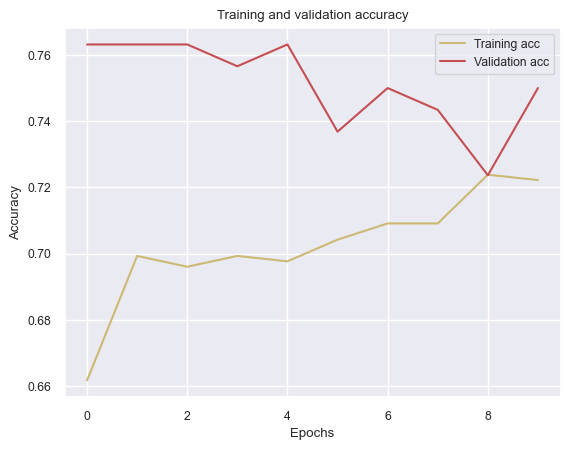

In [118]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
plt.plot(range(epochs), acc, 'y', label='Training acc')
plt.plot(range(epochs), val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 3. 혼동 행렬로 모델 평가

## (1) 다중 분류일 경우 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# 원 핫 인코딩 => 정수형 레이블 변환 
y_test_arg=np.argmax(y_test, axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1) # => 예측값 

print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)

# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

## (2) 이진 분류일 경우 

In [119]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix

# 이진 분류 모델의 성능 평가 
# precision(클래스별 정확도), recall,f1-score(재현율, 균형), support(샘플 개수) 
print(classification_report(y_test,y_pred_class))


print(confusion_matrix(y_test,y_pred_class))

              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82       116
         1.0       0.26      0.14      0.18        36

    accuracy                           0.70       152
   macro avg       0.52      0.51      0.50       152
weighted avg       0.65      0.70      0.67       152

[[102  14]
 [ 31   5]]


### (추가). 칼럼 값의 분포를 0 ~ 1로 설정

In [ ]:

def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7

df_new = MinMaxScaler(df_new)
df_new